[IPython Notebook](rossiter_mclaughlin.ipynb) |  [Python Script](rossiter_mclaughlin.py)

Rossiter-McLaughlin Effect
============================

Setup
-----------------------------

In [1]:
%matplotlib inline

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

/Library/Python/2.7/site-packages/astropy/units/quantity.py:782: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)
Wed, 21 Sep 2016 18:27 BUNDLE       INFO    setting 'freq@primary@component'=6.283185 rad / d from 'freq@constraint' constraint
Wed, 21 Sep 2016 18:27 BUNDLE       INFO    setting 'frac_lost_bol@primary@component'=0.4 from 'frac_lost_bol@constraint' constraint
Wed, 21 Sep 2016 18:27 BUNDLE       INFO    setting 'freq@secondary@component'=6.283185 rad / d from 'freq@secondary@constraint' constraint
Wed, 21 Sep 2016 18:27 BUNDLE       INFO    setting 'frac_lost_bol@secondary@component'=0.4 from 'frac_lost_bol@secondary@constraint' constraint
Wed, 21 Sep 2016 18:27 PARAMETERS   INFO    creating and attaching new parameter: asini
Wed, 21 Sep 2016 18:27 BUNDLE       INFO    setting 'asini@binary@component'=8.0 solRad from 'asini@constraint' constraint
Wed, 21 Sep 2016 18:27 BUNDLE     

Let's make a significant mass ratio and radius ratio...

In [3]:
b['q'] = 0.7

Wed, 21 Sep 2016 18:29 BUNDLE       INFO    setting 'mass@primary@component'=0.449019459045 solMass from 'mass@primary@constraint' constraint
Wed, 21 Sep 2016 18:29 BUNDLE       INFO    setting 'sma@primary@component'=3.29411764706 solRad from 'sma@primary@constraint' constraint
Wed, 21 Sep 2016 18:29 BUNDLE       INFO    setting 'pot@primary@component'=8.6945945137 from 'pot@primary@constraint' constraint
Wed, 21 Sep 2016 18:29 BUNDLE       INFO    setting 'mass@secondary@component'=0.314313621332 solMass from 'mass@secondary@constraint' constraint
Wed, 21 Sep 2016 18:29 BUNDLE       INFO    setting 'sma@secondary@component'=4.70588235294 solRad from 'sma@secondary@constraint' constraint
Wed, 21 Sep 2016 18:29 BUNDLE       INFO    setting 'pot@secondary@component'=6.74227787671 from 'pot@secondary@constraint' constraint


In [4]:
b['rpole@primary'] = 1.0

Wed, 21 Sep 2016 18:29 BUNDLE       INFO    setting 'pot@primary@component'=8.6945945137 from 'pot@primary@constraint' constraint


In [5]:
b['rpole@secondary'] = 0.5

Wed, 21 Sep 2016 18:29 BUNDLE       INFO    setting 'pot@secondary@component'=12.3480525785 from 'pot@secondary@constraint' constraint


In [6]:
b['teff@secondary@component'] = 5000

Wed, 21 Sep 2016 18:29 PARAMETERS   WARNING Object probably has a convective atm (teff=5000K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00


Make sure the primary star is spinning quickly...

In [7]:
b['syncpar@primary@component'] = 2

Wed, 21 Sep 2016 18:29 PARAMETERS   WARNING Object probably has a convective atm (teff=5000K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Wed, 21 Sep 2016 18:29 BUNDLE       INFO    setting 'freq@primary@component'=4.18879 rad / d from 'freq@primary@constraint' constraint
Wed, 21 Sep 2016 18:29 PARAMETERS   WARNING Object probably has a convective atm (teff=5000K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Wed, 21 Sep 2016 18:29 BUNDLE       INFO    setting 'period@primary@component'=1.5 d from 'period@primary@constraint' constraint
Wed, 21 Sep 2016 18:29 PARAMETERS   WARNING Object probably has a convective atm (teff=5000K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Wed, 21 Sep 2016 18:29 BUNDLE       INFO    setting 'pot@primary@component'=8.6945945137 from 'pot@primary@constraint' constraint
Wed, 21 Sep 2016 18:29 PARAMETERS   WARNING Object probably has a convective atm (teff=5000K<

Adding Datasets
-------------------

Now we'll add radial velocity and mesh datasets.  We'll add two identical datasets for RVs so that we can have one computed dynamically and the other computed numerically (these options will need to be set later).

In [8]:
b.add_dataset('rv', times=np.linspace(0,6,201), dataset='dynamicalrvs')  
# TODO: can't set rv_method here because compute options don't exist yet... and that's kind of annoying

Wed, 21 Sep 2016 18:29 PARAMETERS   INFO    copying 'times' parameter for {'component': 'primary'}
Wed, 21 Sep 2016 18:29 PARAMETERS   INFO    copying 'times' parameter for {'component': 'secondary'}
Wed, 21 Sep 2016 18:29 PARAMETERS   INFO    copying 'rvs' parameter for {'component': 'primary'}
Wed, 21 Sep 2016 18:29 PARAMETERS   INFO    copying 'rvs' parameter for {'component': 'secondary'}
Wed, 21 Sep 2016 18:29 PARAMETERS   INFO    copying 'sigmas' parameter for {'component': 'primary'}
Wed, 21 Sep 2016 18:29 PARAMETERS   INFO    copying 'sigmas' parameter for {'component': 'secondary'}
Wed, 21 Sep 2016 18:29 PARAMETERS   INFO    copying 'ld_func' parameter for {'component': 'primary'}
Wed, 21 Sep 2016 18:29 PARAMETERS   INFO    copying 'ld_func' parameter for {'component': 'secondary'}
Wed, 21 Sep 2016 18:29 PARAMETERS   INFO    copying 'ld_coeffs' parameter for {'component': 'primary'}
Wed, 21 Sep 2016 18:29 PARAMETERS   INFO    copying 'ld_coeffs' parameter for {'component': 'se

<ParameterSet: 10 parameters | kinds: rv, rv_dep>

In [9]:
b.add_dataset('rv', times=np.linspace(0,6,201), dataset='numericalrvs')

Wed, 21 Sep 2016 18:29 PARAMETERS   INFO    copying 'times' parameter for {'component': 'primary'}
Wed, 21 Sep 2016 18:29 PARAMETERS   INFO    copying 'times' parameter for {'component': 'secondary'}
Wed, 21 Sep 2016 18:29 PARAMETERS   INFO    copying 'rvs' parameter for {'component': 'primary'}
Wed, 21 Sep 2016 18:29 PARAMETERS   INFO    copying 'rvs' parameter for {'component': 'secondary'}
Wed, 21 Sep 2016 18:29 PARAMETERS   INFO    copying 'sigmas' parameter for {'component': 'primary'}
Wed, 21 Sep 2016 18:29 PARAMETERS   INFO    copying 'sigmas' parameter for {'component': 'secondary'}
Wed, 21 Sep 2016 18:29 PARAMETERS   INFO    copying 'ld_func' parameter for {'component': 'primary'}
Wed, 21 Sep 2016 18:29 PARAMETERS   INFO    copying 'ld_func' parameter for {'component': 'secondary'}
Wed, 21 Sep 2016 18:29 PARAMETERS   INFO    copying 'ld_coeffs' parameter for {'component': 'primary'}
Wed, 21 Sep 2016 18:29 PARAMETERS   INFO    copying 'ld_coeffs' parameter for {'component': 'se

<ParameterSet: 10 parameters | kinds: rv, rv_dep>

Storing the mesh at every timestep is overkill, and will be both computationally and memory intensive.  So let's just sample at the times we care about.

In [10]:
times = b.get_value('times@primary@numericalrvs@dataset')
times = times[times<0.2]
print times

[ 0.    0.03  0.06  0.09  0.12  0.15  0.18]


In [11]:
b.add_dataset('mesh', dataset='mesh01', times=times)

Wed, 21 Sep 2016 18:30 BUNDLE       INFO    re-creating mass constraint for primary
Wed, 21 Sep 2016 18:30 PARAMETERS   WARNING Object probably has a convective atm (teff=5000K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Wed, 21 Sep 2016 18:30 BUNDLE       INFO    setting 'mass@primary@component'=0.449019459045 solMass from 'mass@primary@constraint' constraint
Wed, 21 Sep 2016 18:30 BUNDLE       INFO    re-creating comp_sma constraint for primary
Wed, 21 Sep 2016 18:30 PARAMETERS   WARNING Object probably has a convective atm (teff=5000K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Wed, 21 Sep 2016 18:30 BUNDLE       INFO    setting 'sma@primary@component'=3.29411764706 solRad from 'sma@primary@constraint' constraint
Wed, 21 Sep 2016 18:30 BUNDLE       INFO    re-creating rotation_period constraint for primary
Wed, 21 Sep 2016 18:30 PARAMETERS   WARNING Object probably has a convective atm (teff=5000K<6600K), for which 

<ParameterSet: 1 parameters>

Running Compute
--------------------

In [12]:
b.add_compute(compute='mycompute')

Wed, 21 Sep 2016 18:30 BUNDLE       INFO    adding phoebe 'mycompute' compute to bundle
Wed, 21 Sep 2016 18:30 PARAMETERS   INFO    copying 'enabled' parameter for {'dataset': 'mesh01'}
Wed, 21 Sep 2016 18:30 PARAMETERS   INFO    copying 'enabled' parameter for {'dataset': 'numericalrvs'}
Wed, 21 Sep 2016 18:30 PARAMETERS   INFO    copying 'enabled' parameter for {'dataset': 'dynamicalrvs'}
Wed, 21 Sep 2016 18:30 PARAMETERS   INFO    copying 'mesh_method' parameter for {'component': 'primary'}
Wed, 21 Sep 2016 18:30 PARAMETERS   INFO    copying 'mesh_method' parameter for {'component': 'secondary'}
Wed, 21 Sep 2016 18:30 PARAMETERS   INFO    copying 'delta' parameter for {'component': 'primary'}
Wed, 21 Sep 2016 18:30 PARAMETERS   INFO    copying 'delta' parameter for {'component': 'secondary'}
Wed, 21 Sep 2016 18:30 PARAMETERS   INFO    copying 'maxpoints' parameter for {'component': 'primary'}
Wed, 21 Sep 2016 18:30 PARAMETERS   INFO    copying 'maxpoints' parameter for {'component':

<ParameterSet: 29 parameters | datasets: mesh01, numericalrvs, dynamicalrvs>

Now let's set the rv_method so that one dataset uses the dynamical method and the other uses the flux-weighted (numerical) method.  Note that here we have to use set_value_all or loop over the components, as technically there are parameters for each component-dataset pair.

In [13]:
b.set_value_all('rv_method@dynamicalrvs@mycompute', 'dynamical')
b.set_value_all('rv_method@numericalrvs@mycompute', 'flux-weighted')

Wed, 21 Sep 2016 18:30 PARAMETERS   WARNING Object probably has a convective atm (teff=5000K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Wed, 21 Sep 2016 18:30 PARAMETERS   WARNING Object probably has a convective atm (teff=5000K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Wed, 21 Sep 2016 18:30 PARAMETERS   WARNING Object probably has a convective atm (teff=5000K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Wed, 21 Sep 2016 18:30 PARAMETERS   WARNING Object probably has a convective atm (teff=5000K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Wed, 21 Sep 2016 18:30 PARAMETERS   WARNING Object probably has a convective atm (teff=5000K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Wed, 21 Sep 2016 18:30 PARAMETERS   WARNING Object probably has a convective atm (teff=5000K<6600K), for which gravb_bol=0.32 might be a better a

Let's check to make sure that rv_method is set as we'd expect.

In [14]:
print b['rv_method']

ParameterSet: 4 parameters
  rv_method@primary@numerical...: flux-weighted
  rv_method@primary@dynamical...: dynamical
  rv_method@secondary@numeric...: flux-weighted
  rv_method@secondary@dynamic...: dynamical


In [15]:
b.run_compute()

Wed, 21 Sep 2016 18:30 BUNDLE       WARNING Object probably has a convective atm (teff=5000K<6600K), for which gravb_bol=0.32 might be a better approx than gravb_bol=1.00
Wed, 21 Sep 2016 18:30 BUNDLE       INFO    running phoebe backend to create 'latest' model
Wed, 21 Sep 2016 18:30 UNIVERSE     INFO    initializing mesh for primary
Wed, 21 Sep 2016 18:30 UNIVERSE     INFO    covered surface with 3348 triangles
Wed, 21 Sep 2016 18:30 UNIVERSE     INFO    initializing mesh for secondary
Wed, 21 Sep 2016 18:30 UNIVERSE     INFO    covered surface with 3310 triangles
Wed, 21 Sep 2016 18:30 PASSBANDS    INFO    loading Bolometric:1760-40000 passband
Wed, 21 Sep 2016 18:30 UNIVERSE     INFO    handling reflection (convex case), method='wilson'
Wed, 21 Sep 2016 18:30 PASSBANDS    INFO    loading Johnson:V passband
Wed, 21 Sep 2016 18:30 UNIVERSE     INFO    handling reflection (convex case), method='wilson'
Wed, 21 Sep 2016 18:30 UNIVERSE     INFO    handling reflection (convex case), meth

<ParameterSet: 528 parameters | kinds: rv, mesh>

Plotting 
---------------

Now let's plot the radial velocities.

First we'll plot the dynamical RVs.  Note that dynamical RVs show the true radial velocity of the center of mass of each star, and so we do not see the Rossiter McLaughlin effect.

Wed, 21 Sep 2016 18:32 PARAMETERS   INFO    calling 'mpl' plotting backend for s@primary@dynamicalrvs@latest@model
Wed, 21 Sep 2016 18:32 PARAMETERS   INFO    calling 'mpl' plotting backend for s@secondary@dynamicalrvs@latest@model


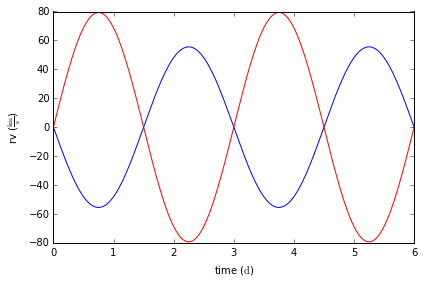

In [16]:
axs, artists = b['dynamicalrvs@model'].plot(component='primary', color='b')
axs, artists = b['dynamicalrvs@model'].plot(component='secondary', color='r')

But the numerical method integrates over the visible surface elements, giving us what we'd observe if deriving RVs from observed spectra of the binary.  Here we do see the Rossiter McLaughlin effect.  You'll also notice that RVs are not available for the secondary star when its completely occulted (they're nans in the array).

Wed, 21 Sep 2016 18:32 PARAMETERS   INFO    calling 'mpl' plotting backend for s@primary@numericalrvs@latest@model
Wed, 21 Sep 2016 18:32 PARAMETERS   INFO    calling 'mpl' plotting backend for s@secondary@numericalrvs@latest@model


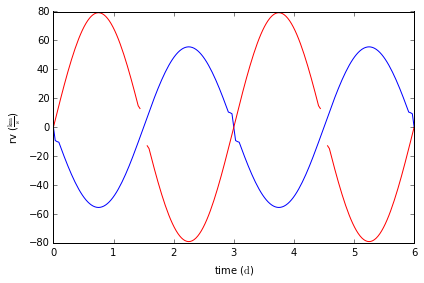

In [17]:
axs, artists = b['numericalrvs@model'].plot(component='primary', color='b')
axs, artists = b['numericalrvs@model'].plot(component='secondary', color='r')

To visualize what is happening, we can plot the radial velocities of each surface element in the mesh at one of these times.

Here just plot on the mesh@model parameterset - the mesh will automatically get coordinates from mesh01 and then we point to rvs@numericalrvs for the facecolors.

Wed, 21 Sep 2016 18:32 PARAMETERS   INFO    calling 'mpl' plotting backend for None@None
Wed, 21 Sep 2016 18:32 PLOTTING     INFO    defaulting to 'RdBu_r' colormap for 'rvs'
Wed, 21 Sep 2016 18:32 PLOTTING     INFO    forcing color range to be centered around 0 for 'rvs@numericalrvs'
/usr/local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:242: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:
/usr/local/lib/python2.7/site-packages/phoebe/frontend/plotting.py:242: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pckwargs['edgecolors'] in ['none', 'None', None] and pckwargs['facecolors'] not in ['none', 'None', None]:


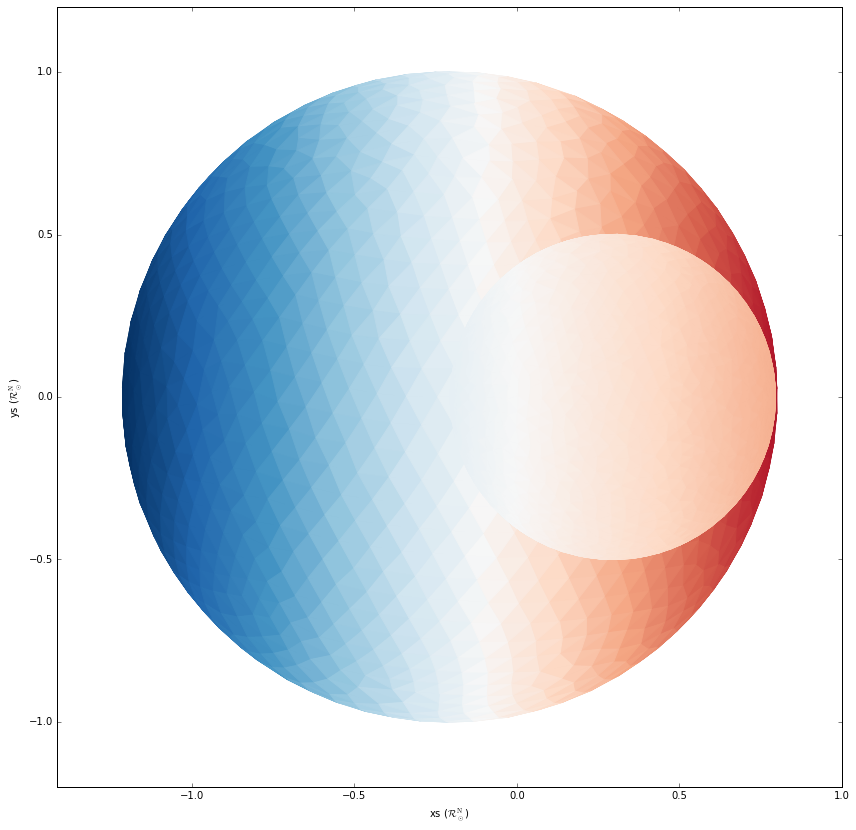

In [18]:
fig = plt.figure(figsize=(12,12))
axs, artists = b['mesh@model'].plot(time=0.03, facecolor='rvs@numericalrvs', edgecolor=None)

Here you can see that the secondary star is blocking part of the "red" RVs of the primary star.

This is essentially the same as plotting the negative z-component of the velocities (for convention - our system is in a right handed system with +z towards the viewer, but RV convention has negative RVs for blue shifts).

We could also plot the RV per triangle by plotting 'vzs'.  Note that this is actually defaulting to an inverted colormap to show you the same colorscheme ('RdBu_r' vs 'RdBu').

Wed, 21 Sep 2016 18:32 PARAMETERS   INFO    calling 'mpl' plotting backend for None@mesh01
Wed, 21 Sep 2016 18:32 PLOTTING     INFO    defaulting to 'RdBu' colormap for 'vzs'
Wed, 21 Sep 2016 18:32 PLOTTING     INFO    forcing color range to be centered around 0 for 'vzs'


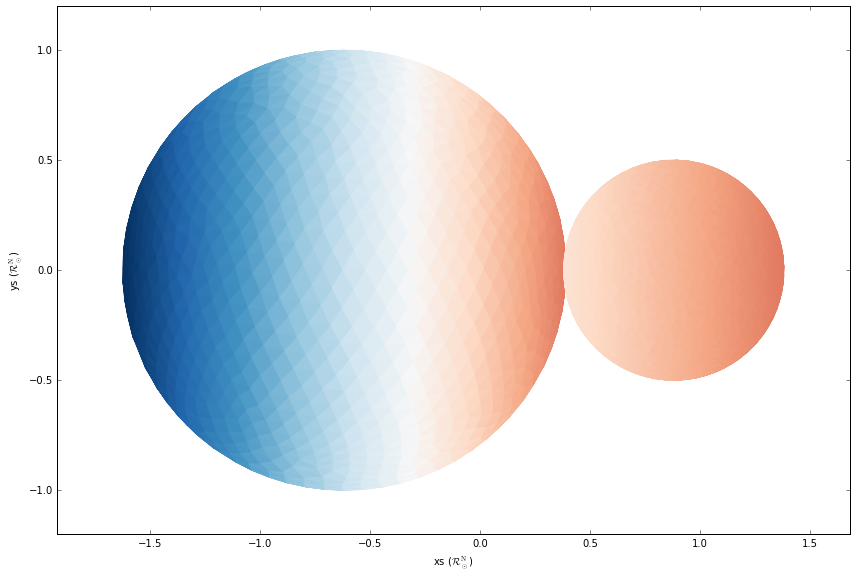

In [19]:
fig = plt.figure(figsize=(12,12))
axs, artists = b['mesh01@model'].plot(time=0.09, facecolor='vzs', edgecolor=None)